In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/Users/adyutaindraadyatma/Downloads/MNIST/train.csv')

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):  ## Rectified Linear Equation
    return np.maximum(Z, 0)

def softmax(Z): ## softmax activation 
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X): ## ini froward props nya
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: " , i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
        return W1, b1, W2, b2
        

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 2 0 ... 0 6 7] [4 1 7 ... 3 5 0]
0.08302439024390244
Iteration:  10
[0 2 7 ... 0 8 7] [4 1 7 ... 3 5 0]
0.2006829268292683
Iteration:  20
[0 2 7 ... 0 8 7] [4 1 7 ... 3 5 0]
0.29565853658536584
Iteration:  30
[0 1 7 ... 3 8 7] [4 1 7 ... 3 5 0]
0.3816829268292683
Iteration:  40
[0 1 7 ... 3 8 7] [4 1 7 ... 3 5 0]
0.4376829268292683
Iteration:  50
[0 1 7 ... 3 8 7] [4 1 7 ... 3 5 0]
0.47760975609756096
Iteration:  60
[0 1 7 ... 3 0 4] [4 1 7 ... 3 5 0]
0.5118780487804878
Iteration:  70
[0 1 7 ... 3 0 4] [4 1 7 ... 3 5 0]
0.543609756097561
Iteration:  80
[0 1 7 ... 3 0 4] [4 1 7 ... 3 5 0]
0.5716829268292682
Iteration:  90
[4 1 7 ... 3 0 8] [4 1 7 ... 3 5 0]
0.5950243902439024
Iteration:  100
[4 1 7 ... 3 0 8] [4 1 7 ... 3 5 0]
0.6166341463414634
Iteration:  110
[4 1 7 ... 3 0 5] [4 1 7 ... 3 5 0]
0.6360731707317073
Iteration:  120
[4 1 7 ... 3 0 5] [4 1 7 ... 3 5 0]
0.6531219512195122
Iteration:  130
[4 1 7 ... 3 0 5] [4 1 7 ... 3 5 0]
0.6675853658536586
Iteration:  140

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


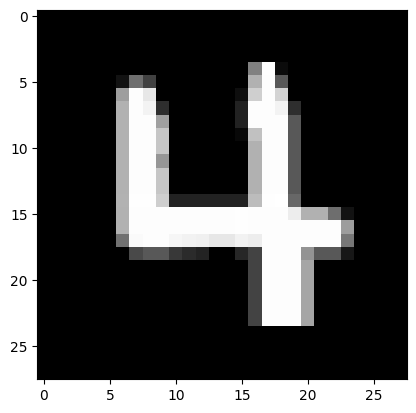

Prediction:  [1]
Label:  1


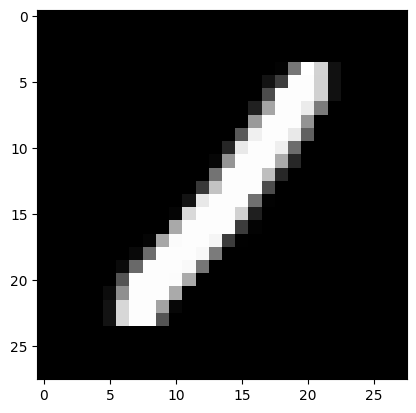

Prediction:  [7]
Label:  7


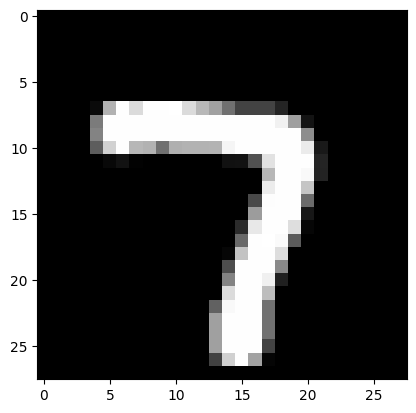

Prediction:  [2]
Label:  2


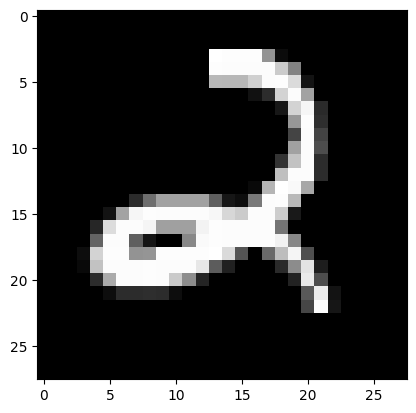

In [13]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [14]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 9 2 2 9 5 9 1 9 9 9 1 7 8 0 8 0 6 9 8 1 0 6 6 1 1 3 9 2 9 9 7 3 1 5 1 4
 8 6 7 3 1 3 2 3 2 7 8 0 7 2 7 1 2 3 6 6 8 4 1 2 1 1 8 1 5 7 6 1 8 5 3 9 9
 1 8 3 3 1 2 4 8 9 1 5 0 5 9 7 2 2 0 3 2 3 8 0 2 1 6 2 3 4 2 4 4 0 8 9 5 6
 0 7 0 3 3 3 0 5 6 4 3 4 2 8 1 6 2 9 5 8 8 6 6 0 4 5 4 7 8 3 1 5 3 3 4 1 2
 0 1 1 3 9 7 9 3 4 0 1 7 9 1 5 0 7 8 9 6 7 7 8 5 5 5 8 8 0 4 5 5 3 0 1 3 9
 8 2 4 8 7 1 4 6 8 1 4 2 0 3 0 0 3 3 7 9 7 5 5 4 0 1 7 1 1 9 5 6 8 3 0 3 3
 9 7 2 9 8 8 5 9 0 1 6 5 7 5 6 8 3 5 2 6 6 9 9 2 7 5 4 8 2 7 1 8 5 2 8 6 9
 8 1 4 6 3 0 4 3 3 3 9 7 7 8 5 1 6 7 6 6 5 9 7 7 8 3 7 8 1 3 7 0 9 8 2 9 9
 0 3 6 0 3 1 0 0 7 3 0 8 9 9 3 6 0 0 4 8 1 7 9 5 9 9 3 6 0 1 2 3 4 5 1 8 6
 1 0 0 4 7 2 9 4 9 5 8 8 5 6 6 7 8 6 6 8 1 6 3 6 7 1 9 9 6 0 0 9 4 1 0 3 3
 1 8 9 6 5 1 0 7 6 0 6 0 7 6 5 1 0 3 8 0 9 5 7 1 9 9 5 7 4 1 0 4 9 9 9 7 4
 7 4 6 3 2 1 2 4 2 1 7 4 3 2 5 5 2 2 3 6 7 0 6 5 5 0 2 8 3 6 6 6 8 0 6 7 4
 6 9 8 3 0 1 2 9 7 2 1 5 8 1 4 7 3 4 2 5 2 2 7 0 0 5 4 6 5 1 4 7 0 9 0 0 2
 2 1 0 7 5 4 5 5 0 1 1 8 

0.854